In [67]:
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from keras.layers import Conv2D,  MaxPooling2D
from tensorflow.keras.layers import MaxPool2D, Dropout, BatchNormalization
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from keras.utils import plot_model
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Activation
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [68]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

Train folders have 1000 images in every subfolder, and val folder have 200 imgaes in every subfolder.

In [69]:
def load_images_from_folder(folder):
    images = []
    labels = []
    class_labels = {}  
    label_count = 0
    for class_folder in os.listdir(folder):
        if os.path.isdir(os.path.join(folder, class_folder)):
            class_labels[class_folder] = label_count
            label_count += 1
    for class_folder, class_label in class_labels.items():
        class_path = os.path.join(folder, class_folder)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
            img = cv2.resize(img, (32, 32))  
            img = img / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(class_label)
    return np.array(images), np.array(labels), class_labels

train_folder = r'C:\University\CENG 481 - Artificial Neural Networks\Homework 3\inaturalist_12K\train'
test_folder = r'C:\University\CENG 481 - Artificial Neural Networks\Homework 3\inaturalist_12K\val'


X_train, y_train, class_labels_train = load_images_from_folder(train_folder)
X_test, y_test, class_labels_test = load_images_from_folder(test_folder)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)
print("Class labels for training data:", class_labels_train)
print("Class labels for testing data:", class_labels_test)

Train shapes: (10000, 32, 32, 3) (10000,)
Test shapes: (2000, 32, 32, 3) (2000,)
Class labels for training data: {'Amphibia': 0, 'Animalia': 1, 'Arachnida': 2, 'Aves': 3, 'Fungi': 4, 'Insecta': 5, 'Mammalia': 6, 'Mollusca': 7, 'Plantae': 8, 'Reptilia': 9}
Class labels for testing data: {'Amphibia': 0, 'Animalia': 1, 'Arachnida': 2, 'Aves': 3, 'Fungi': 4, 'Insecta': 5, 'Mammalia': 6, 'Mollusca': 7, 'Plantae': 8, 'Reptilia': 9}


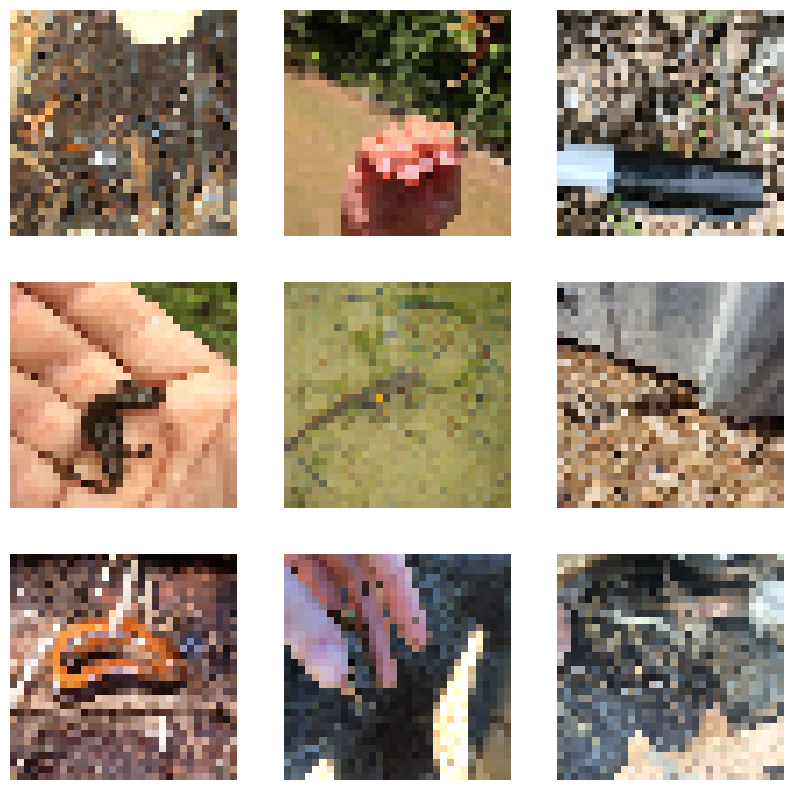

In [70]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

- First CNN without Tuning Sequantial

In [71]:
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(32, (1, 1), activation='relu'),  # 1x1 convolutional layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 conv2d_46 (Conv2D)          (None, 4, 4, 32)        

In [72]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
print(X_test.shape, y_test.shape)

(2000, 32, 32, 3) (2000,)


In [74]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Train shapes:", X_train.shape, y_train.shape)
print("Validation shapes:", X_valid.shape, y_valid.shape)

Train shapes: (8000, 32, 32, 3) (8000,)
Validation shapes: (2000, 32, 32, 3) (2000,)


In [75]:
history = model1.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
250/250 [==============================] - 4s 13ms/step - loss: 2.2412 - accuracy: 0.1517 - val_loss: 2.2791 - val_accuracy: 0.1715
Epoch 2/30
250/250 [==============================] - 3s 12ms/step - loss: 2.1495 - accuracy: 0.2025 - val_loss: 2.1441 - val_accuracy: 0.2150
Epoch 3/30
250/250 [==============================] - 3s 12ms/step - loss: 2.0723 - accuracy: 0.2424 - val_loss: 2.0676 - val_accuracy: 0.2500
Epoch 4/30
250/250 [==============================] - 3s 12ms/step - loss: 2.0151 - accuracy: 0.2756 - val_loss: 2.0150 - val_accuracy: 0.2810
Epoch 5/30
250/250 [==============================] - 3s 12ms/step - loss: 1.9768 - accuracy: 0.2952 - val_loss: 2.0046 - val_accuracy: 0.2780
Epoch 6/30
250/250 [==============================] - 3s 12ms/step - loss: 1.9347 - accuracy: 0.3067 - val_loss: 2.0033 - val_accuracy: 0.2975
Epoch 7/30
250/250 [==============================] - 3s 12ms/step - loss: 1.8988 - accuracy: 0.3335 - val_loss: 1.9495 - val_accuracy: 0.3080

In [76]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

63/63 [==============================] - 0s 6ms/step - loss: 4.4308 - accuracy: 0.2770
Test accuracy: 0.2770000100135803


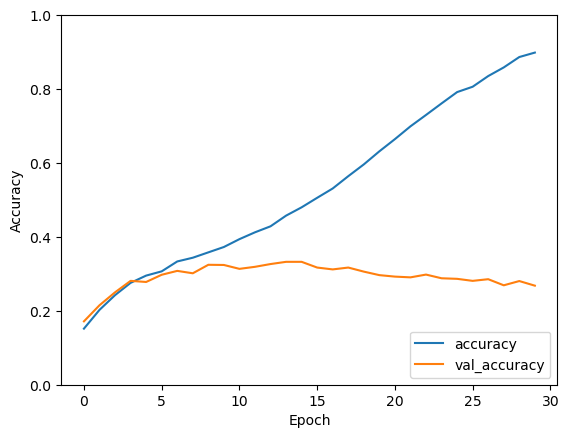

In [77]:
# Visualizing
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

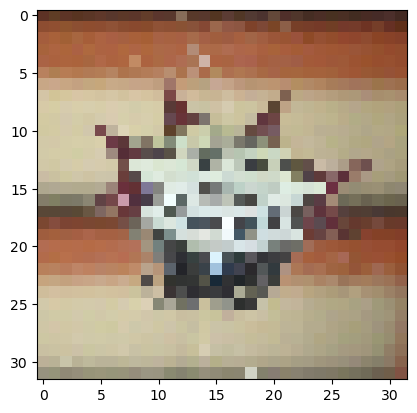

1/1 [==============================] - 0s 15ms/step
Predicted label: 1
True label: 2


In [80]:
example_image_index = 453

example_image = X_test[example_image_index]
plt.figure()
plt.imshow(example_image, cmap="gray")
plt.grid(False)
plt.show()

true_label = y_test[example_image_index]

example_image = X_test[example_image_index:(example_image_index+1)]

example_predict = model.predict(example_image)
predict_label = np.argmax(example_predict[0])

print(f"Predicted label: {predict_label}")
print(f"True label: {true_label}")

BATCH NORMALIZATION


In [89]:

model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),  # BatchNormalization layer
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # BatchNormalization layer
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(32, (1, 1), activation='relu'),  # 1x1 convolutional layer
    layers.BatchNormalization(),  # BatchNormalization layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') 

model2.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_18 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_19 (Bat  (None, 13, 13, 64)       256       
 chNormalization)                                                
                                                     

In [90]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_18 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_19 (Bat  (None, 13, 13, 64)       256       
 chNormalization)                                                
                                                     

In [108]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [109]:
start_time = time.time()
h1 = model2.fit(X_train, y_train, epochs=4, validation_data=(X_valid, y_valid))
last = time.time()- start_time
print(last)

Epoch 1/4
250/250 [==============================] - 6s 19ms/step - loss: 1.7062 - accuracy: 0.3981 - val_loss: 2.2653 - val_accuracy: 0.2485
Epoch 2/4
250/250 [==============================] - 5s 19ms/step - loss: 1.5658 - accuracy: 0.4560 - val_loss: 2.2150 - val_accuracy: 0.2715
Epoch 3/4
250/250 [==============================] - 5s 18ms/step - loss: 1.4164 - accuracy: 0.5100 - val_loss: 2.3569 - val_accuracy: 0.2645
Epoch 4/4
250/250 [==============================] - 4s 18ms/step - loss: 1.2592 - accuracy: 0.5702 - val_loss: 2.4586 - val_accuracy: 0.2560
19.673621892929077


In [110]:
# With a learning rate scheduler
reduce_lr = LearningRateScheduler(lambda epoch, lr: lr * 0.9)  
h2 = model2.fit(X_train, y_train, epochs=4, validation_data=(X_valid, y_valid), verbose=1, callbacks=[reduce_lr])


Epoch 1/4
250/250 [==============================] - 5s 19ms/step - loss: 1.0307 - accuracy: 0.6532 - val_loss: 2.5509 - val_accuracy: 0.2865 - lr: 9.0000e-04
Epoch 2/4
250/250 [==============================] - 5s 18ms/step - loss: 0.8260 - accuracy: 0.7278 - val_loss: 2.9509 - val_accuracy: 0.2390 - lr: 8.1000e-04
Epoch 3/4
250/250 [==============================] - 4s 17ms/step - loss: 0.6147 - accuracy: 0.8033 - val_loss: 2.9016 - val_accuracy: 0.2675 - lr: 7.2900e-04
Epoch 4/4
250/250 [==============================] - 4s 18ms/step - loss: 0.4321 - accuracy: 0.8760 - val_loss: 3.4170 - val_accuracy: 0.2335 - lr: 6.5610e-04


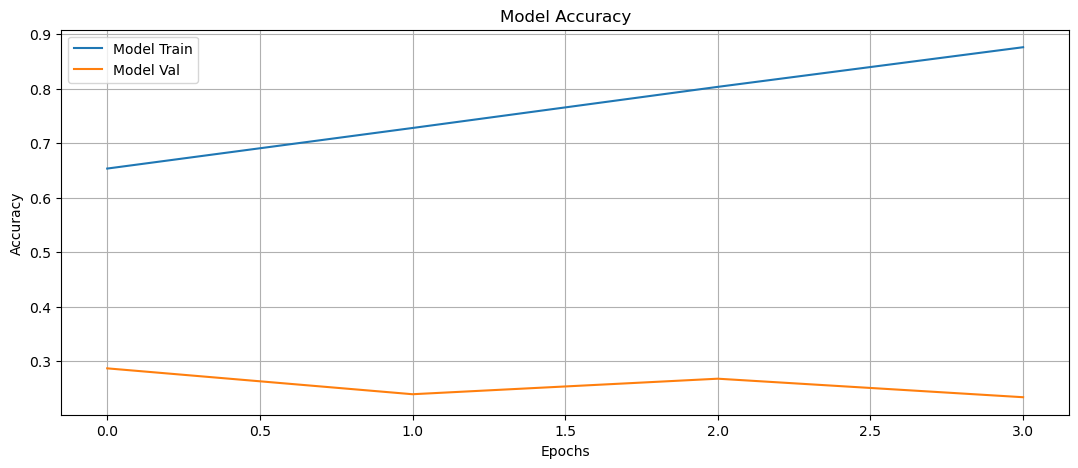

In [111]:
plt.figure(figsize=(13, 5))
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Model Train','Model Val'])
plt.grid()
plt.show()

------------------------------------------------------

Functional API

In [112]:
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
# Utiliaing functional API 

inputs = Input(shape=(32,32,3))
y = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same')(inputs)
y = BatchNormalization()(y)
y = Conv2D(filters=32, kernel_size=(3, 3),activation='relu')(y)
y = BatchNormalization()(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=32, kernel_size=(5, 5),activation='relu')(y)
y = Flatten()(y)
y = Dropout(0.5)(y)
outputs = Dense(10, activation='softmax')(y)
model3 = Model(inputs=inputs, outputs=outputs)

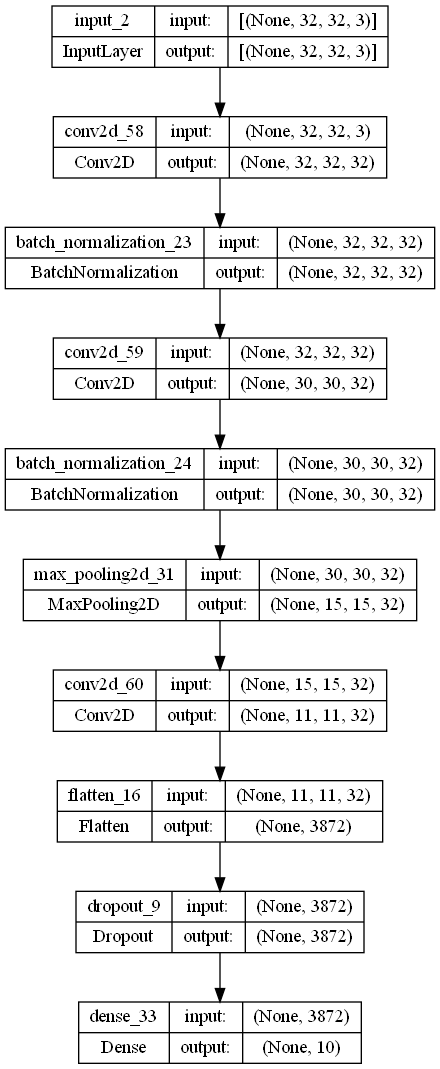

In [113]:
from keras.utils import plot_model
plot_model(model3, show_shapes=True, to_file='cnn_functional.png')

In [114]:
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_58 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_23 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_59 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_24 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 15, 15, 32)       0   

In [115]:
model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [117]:
import time
start_time = time.time()
h3 = model3.fit(X_train, y_train, epochs=4, validation_data=(X_valid, y_valid))
last = time.time()- start_time
print(last)

Epoch 1/4
250/250 [==============================] - 9s 32ms/step - loss: 2.2559 - accuracy: 0.1867 - val_loss: 3.6378 - val_accuracy: 0.1375
Epoch 2/4
250/250 [==============================] - 8s 30ms/step - loss: 2.1413 - accuracy: 0.2324 - val_loss: 2.1587 - val_accuracy: 0.2490
Epoch 3/4
250/250 [==============================] - 8s 31ms/step - loss: 2.0784 - accuracy: 0.2524 - val_loss: 2.1510 - val_accuracy: 0.2400
Epoch 4/4
250/250 [==============================] - 8s 30ms/step - loss: 2.0474 - accuracy: 0.2758 - val_loss: 2.1534 - val_accuracy: 0.2125
32.103671073913574


- Inception Module

In [119]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Activation
def inception_module(layer_in, f1, f2, f3, num_classes=10):
    conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in) 
   
    layer_out = Concatenate()([conv1, conv3, conv5, pool])
    layer_out = Flatten()(layer_out)
    output_layer = Dense(num_classes, activation='softmax')(layer_out)
    return output_layer

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_67 (Conv2D)             (None, 32, 32, 64)   256         ['input_11[0][0]']               
                                                                                                  
 conv2d_68 (Conv2D)             (None, 32, 32, 128)  3584        ['input_11[0][0]']               
                                                                                                  
 conv2d_69 (Conv2D)             (None, 32, 32, 32)   2432        ['input_11[0][0]']               
                                                                                            

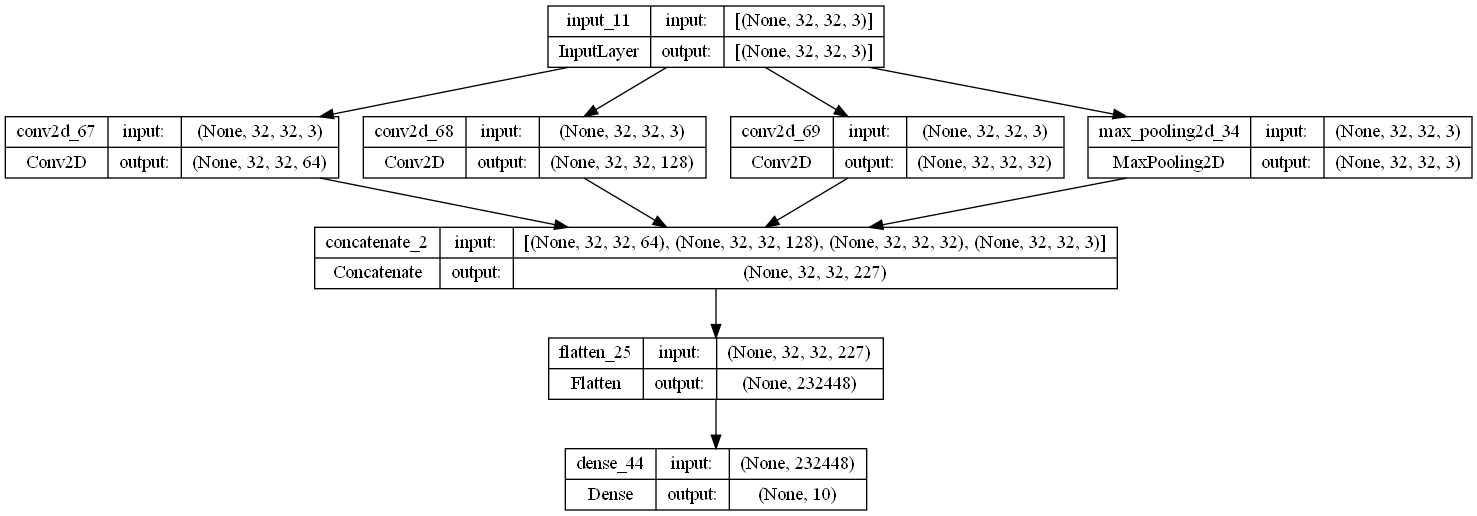

In [151]:
input_layer = Input(shape=(32, 32, 3))
layer = inception_module(input_layer, 64, 128, 32)
model4 = Model(input_layer, outputs=layer)
model4.summary()
plot_model(model4, show_shapes=True, to_file='naive_inception_module.png')

In [152]:
model4.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [153]:
start_time = time.time()
h4 = model4.fit(X_train, y_train, epochs=4, validation_data=(X_valid, y_valid))
last = time.time()- start_time
print(last)

Epoch 1/4
250/250 [==============================] - 11s 40ms/step - loss: 2.7484 - accuracy: 0.1996 - val_loss: 2.3080 - val_accuracy: 0.2085
Epoch 2/4
250/250 [==============================] - 10s 39ms/step - loss: 1.9862 - accuracy: 0.3094 - val_loss: 2.2626 - val_accuracy: 0.2145
Epoch 3/4
250/250 [==============================] - 10s 39ms/step - loss: 1.6182 - accuracy: 0.4494 - val_loss: 2.2134 - val_accuracy: 0.2595
Epoch 4/4
250/250 [==============================] - 10s 39ms/step - loss: 1.1628 - accuracy: 0.6109 - val_loss: 2.4919 - val_accuracy: 0.2410
40.71713829040527


- Pre Trained Model (VGG19)

In [132]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score

WIDTH = 32
HEIGHT = 32
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(WIDTH, HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical', 
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(WIDTH, HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # No need to shuffle test data
)

base_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(WIDTH, HEIGHT, 3))
base_model.summary()

train_features = base_model.predict(train_generator)
test_features = base_model.predict(test_generator)

model4 = Sequential([
    Flatten(input_shape=train_features.shape[1:]),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')  
])

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4.fit(train_features, train_generator.classes, epochs=10, batch_size=BATCH_SIZE, validation_split=0.2)

# Prediction
predictions = model4.predict(test_features)
predicted_classes = np.argmax(predictions, axis=1)

# Evaluation
true_classes = test_generator.classes
accuracy = accuracy_score(true_classes, predicted_classes)
print("Test Accuracy:", accuracy)


Found 10000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
63/63 [==============================] - 17s 260ms/step
Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 2.1321 - accuracy: 0.1249 - val_loss: 7.6865 - val_accuracy: 0.0000e+00
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 2.0827 - accuracy: 0.1437 - val_loss: 8.1781 - val_accuracy: 0.0000e+00
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 2.0684 - accuracy: 0.1570 - val_loss: 8.1614 - val_accuracy: 0.0000e+00
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 2.0489 - accuracy: 0.1756 - val_loss: 8.7542 - val_accuracy: 0.0000e+00
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 2.0331 - accuracy: 0.1796 - val_loss: 8.7400 - val_accuracy: 0.0000e+00
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 2.0117 - accuracy: 0.1968 - val_loss: 8.8376 - val_ac

------------------------

- FINETUNING

In [146]:
def build_finetune_model(base_model, dropout, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    x = Dropout(dropout)(x)

    predictions = Dense(num_classes, activation='softmax')(x)

    finetune_model = Model(inputs=base_model.input, outputs=predictions)
    plt.figure()
    plot_model(finetune_model, show_shapes=True)
    plt.show()

    return finetune_model

In [147]:
print(len(class_labels_test))
finetune_model = build_finetune_model(base_model, dropout= 0.2, num_classes=10)

10


<Figure size 640x480 with 0 Axes>

In [148]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.00001
adam = Adam(learning_rate=learning_rate)
finetune_model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])


In [149]:
val_datagen = ImageDataGenerator(preprocessing_function=preprocessing_function)
validation_generator = val_datagen.flow_from_directory(test_folder, target_size =(WIDTH , HEIGHT))

Found 2000 images belonging to 10 classes.


In [150]:
print("Number of samples in train_generator:", train_generator.samples)

h5 = finetune_model.fit(train_generator, 
                        epochs=4, 
                        steps_per_epoch=train_generator.samples // BATCH_SIZE,
                        validation_data=validation_generator,
                        validation_steps=validation_generator.samples // BATCH_SIZE,
                        shuffle=True)


Number of samples in train_generator: 10000
Epoch 1/4
312/312 [==============================] - 125s 399ms/step - loss: 2.8152 - accuracy: 0.0934 - val_loss: 27.1271 - val_accuracy: 0.1376
Epoch 2/4
312/312 [==============================] - 106s 339ms/step - loss: 2.6722 - accuracy: 0.0989 - val_loss: 27.5685 - val_accuracy: 0.1381
Epoch 3/4
312/312 [==============================] - 287s 922ms/step - loss: 2.5944 - accuracy: 0.0948 - val_loss: 28.0296 - val_accuracy: 0.1371
Epoch 4/4
312/312 [==============================] - 110s 353ms/step - loss: 2.5024 - accuracy: 0.1088 - val_loss: 28.5643 - val_accuracy: 0.1401


- ResNet

In [155]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(WIDTH, HEIGHT, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

finetune_model = Model(inputs=base_model.input, outputs=predictions)

finetune_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

finetune_model.summary()

history = finetune_model.fit(train_generator, 
                              epochs=4, 
                              steps_per_epoch=train_generator.samples // BATCH_SIZE,
                              validation_data=validation_generator,
                              validation_steps=validation_generator.samples // BATCH_SIZE,
                              shuffle=True)


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_13[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            